In [6]:
import pandas as pd



data = pd.read_csv('/content/drive/MyDrive/smresampled_dataset.csv')
data.head(5)


,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,target
0,4959,12.66,0,0.027,5,117.08,3,2009,1,1,3,1
1,6380,16.54,0,0.144,4,171.43,2,1999,1,0,0,2
2,4096,14.28,2,0.031,3,162.08,0,1987,0,1,2,2
3,6701,12.10,0,0.112,0,186.31,0,1987,0,1,2,2
4,7282,9.57,1,0.010,8,123.67,1,1998,2,2,1,1


In [7]:
data.isnull().sum()

Product_Id                  0
Product_Weight              0
Product_Sugar_Content       0
Product_Allocated_Area      0
Product_Type                0
Product_MRP                 0
Store_Id                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_City_Type    0
Store_Type                  0
target                      0
dtype: int64

In [8]:
data['Product_Allocated_Area']=data['Product_Allocated_Area'].ffill()

In [9]:
data.isnull().sum()

Product_Id                  0
Product_Weight              0
Product_Sugar_Content       0
Product_Allocated_Area      0
Product_Type                0
Product_MRP                 0
Store_Id                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_City_Type    0
Store_Type                  0
target                      0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Product_Id'] = le.fit_transform(data['Product_Id'])
data['Product_Sugar_Content'] = le.fit_transform(data['Product_Sugar_Content'])
data['Product_Type'] = le.fit_transform(data['Product_Type'])
data['Store_Id'] = le.fit_transform(data['Store_Id'])
data['Store_Size'] = le.fit_transform(data['Store_Size'])
data['Store_Location_City_Type'] = le.fit_transform(data['Store_Location_City_Type'])
data['Store_Type'] = le.fit_transform(data['Store_Type'])
data['target'] = le.fit_transform(data['target'])

In [31]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


X = data.iloc[:,0:11]
y = data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Standardize features (recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
clf = SVC(kernel='rbf', random_state=42)  # 'rbf' kernel is commonly used

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")



Accuracy: 0.9507829977628636
Confusion Matrix:
[[1007    1   16]
 [   0 1055   20]
 [  86   31  913]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1024
           1       0.97      0.98      0.98      1075
           2       0.96      0.89      0.92      1030

    accuracy                           0.95      3129
   macro avg       0.95      0.95      0.95      3129
weighted avg       0.95      0.95      0.95      3129



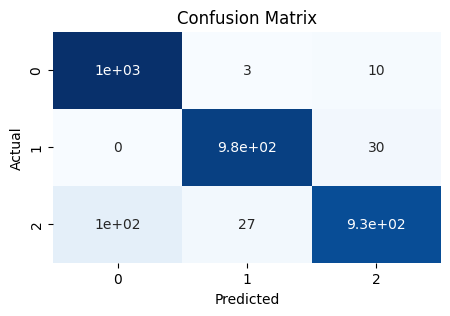

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
report=classification_report(y_test,y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      1059
           1       0.97      0.97      0.97      1014
           2       0.96      0.88      0.92      1056

    accuracy                           0.95      3129
   macro avg       0.95      0.95      0.95      3129
weighted avg       0.95      0.95      0.95      3129

